In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from joblib import Parallel, delayed
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm

In [4]:
#read csv
df = pd.read_csv("RFLFSODataFull.csv")
print(df.dtypes)

FSO_Att                  float64
RFL_Att                  float64
AbsoluteHumidity         float64
AbsoluteHumidityMax      float64
AbsoluteHumidityMin      float64
Distance                 float64
Frequency                  int64
Particulate              float64
ParticulateMax           float64
ParticulateMin           float64
RainIntensity            float64
RainIntensityMax         float64
RainIntensityMin         float64
RelativeHumidity         float64
SYNOPCode                  int64
Temperature              float64
TemperatureDifference    float64
TemperatureMax           float64
TemperatureMin           float64
Time                       int64
Visibility               float64
VisibilityMax            float64
VisibilityMin            float64
WindDirection            float64
WindSpeed                float64
WindSpeedMax             float64
WindSpeedMin             float64
dtype: object


In [5]:
#preprocessing
df['SYNOPCode']=df['SYNOPCode'].astype('category')
X=df.drop(columns=['FSO_Att','RFL_Att'])
y_FSO=df['FSO_Att']
y_RFL=df['RFL_Att']



In [6]:
#counting
weather_counts = df['SYNOPCode'].value_counts()
print(weather_counts)

0    56964
6    25018
5     6605
8     1716
4      466
7      419
3      191
Name: SYNOPCode, dtype: int64


In [7]:
# #stratified sampling trainset
# X_synop_0 = X_train[X_train['SYNOPCode'] == 0]
# y_synop_0_FSO = y_FSO_train[X_synop_0.index]
# y_synop_0_RFL = y_RFL_train[X_synop_0.index]
# # group trainset by Distance, time and Frequency
# # create an empty list to save sample
# sampled_X = []
# sampled_y_FSO = []
# sampled_y_RFL = []
# #stratified sampling X
# sampled_X=X_synop_0.groupby(['Distance','Frequency','Time'], group_keys=False).apply(
#     lambda group:group.sample(n=min(5, len(group)), random_state=42)
# )
# #make Y correspond to X
# sampled_y_FSO=y_synop_0_FSO.loc[sampled_X.index]
# sampled_y_RFL=y_synop_0_RFL.loc[sampled_X.index]
# #delete synop_0 data in the trainset
# X_no_synop_0 = X_train[X_train['SYNOPCode'] != 0].reset_index(drop=True)
# y_FSO_no_synop_0 = y_FSO_train[X_train['SYNOPCode'] != 0].reset_index(drop=True)
# y_RFL_no_synop_0 = y_RFL_train[X_train['SYNOPCode'] != 0].reset_index(drop=True)
# #merge data with deleted trainest and sampled synop_0 trainset data
# X_combined = pd.concat([X_no_synop_0, sampled_X], ignore_index=True)
# y_FSO_combined = pd.concat([y_FSO_no_synop_0, sampled_y_FSO], ignore_index=True)
# y_RFL_combined = pd.concat([y_RFL_no_synop_0, sampled_y_RFL], ignore_index=True)
# #redistribute data
# combined = pd.concat([X_combined, y_FSO_combined, y_RFL_combined], axis=1)
# shuffled_combined = combined.sample(frac=1, random_state=42).reset_index(drop=True)
# X_train = shuffled_combined.iloc[:, :-2]
# y_FSO_train = shuffled_combined.iloc[:, -2]
# y_RFL_train = shuffled_combined.iloc[:, -1]

In [8]:
#data preperation
#synop_0
X_train_0 = X[X['SYNOPCode']==0].reset_index(drop=True)
y_FSO_train_0 = y_FSO[X['SYNOPCode'] == 0].reset_index(drop=True)
y_RFL_train_0 = y_RFL[X['SYNOPCode'] == 0].reset_index(drop=True)
#synop_3
X_train_3 = X[X['SYNOPCode']==3].reset_index(drop=True)
y_FSO_train_3 = y_FSO[X['SYNOPCode'] == 3].reset_index(drop=True)
y_RFL_train_3 = y_RFL[X['SYNOPCode'] == 3].reset_index(drop=True)
#synop_4
X_train_4 = X[X['SYNOPCode']==4].reset_index(drop=True)
y_FSO_train_4 = y_FSO[X['SYNOPCode'] == 4].reset_index(drop=True)
y_RFL_train_4 = y_RFL[X['SYNOPCode'] == 4].reset_index(drop=True)
#synop_5
X_train_5 = X[X['SYNOPCode']==5].reset_index(drop=True)
y_FSO_train_5 = y_FSO[X['SYNOPCode'] == 5].reset_index(drop=True)
y_RFL_train_5 = y_RFL[X['SYNOPCode'] == 5].reset_index(drop=True)
#synop_6
X_train_6 = X[X['SYNOPCode']==6].reset_index(drop=True)
y_FSO_train_6 = y_FSO[X['SYNOPCode'] == 6].reset_index(drop=True)
y_RFL_train_6 = y_RFL[X['SYNOPCode'] == 6].reset_index(drop=True)
#synop_7
X_train_7 = X[X['SYNOPCode']==7].reset_index(drop=True)
y_FSO_train_7 = y_FSO[X['SYNOPCode'] == 7].reset_index(drop=True)
y_RFL_train_7 = y_RFL[X['SYNOPCode'] == 7].reset_index(drop=True)
#synop_8
X_train_8 = X[X['SYNOPCode']==8].reset_index(drop=True)
y_FSO_train_8 = y_FSO[X['SYNOPCode'] == 8].reset_index(drop=True)
y_RFL_train_8 = y_RFL[X['SYNOPCode'] == 8].reset_index(drop=True)

In [9]:
# #define feature selection function
def fs(X, y):
    # Initialize S as the set of all predictor variables
    features = X.columns.tolist()
    #  Initialize an empty table R
    result_table = pd.DataFrame(columns=['feature', 'RMSE', 'R2_score'])
    print('----start training----')
    while features:
        # Train a random forest with the current set of features
        rf = RandomForestRegressor(n_estimators=100, random_state=42,n_jobs=-1)
        rf.fit(X[features], y)
        
        # Calculate RMSE and R2 for the current random forest
        y_pred = rf.predict(X[features])
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        r2 = r2_score(y, y_pred)
        
        # Rank importance and find the least important feature
        importance = rf.feature_importances_
        importance_df = pd.DataFrame({'feature': features, 'importance': importance})
        importance_df = importance_df.sort_values(by='importance', ascending=True)
        least_important_feature = importance_df.iloc[0]['feature']
        
        # Remove the least important feature from S and log the results
        features.remove(least_important_feature)
        Feature_info = pd.DataFrame([{
            'feature': least_important_feature,
            'RMSE': rmse,
            'R2_score': r2
        }])

        # Concatenate the new row to the result table
        result_table = pd.concat([result_table, Feature_info], ignore_index=True)
        
        # Display progress
        tqdm.write(f"Removed: {least_important_feature}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

    return result_table



In [10]:
#define plot function
def plot_results(result_RFL, result_FSO, code):
    # Extract data from result_RFL
    features_RFL = result_RFL['feature']
    rmse_values_RFL = result_RFL['RMSE']
    r2_values_RFL = result_RFL['R2_score']

    # Extract data from result_FSO
    features_FSO = result_FSO['feature']
    rmse_values_FSO = result_FSO['RMSE']
    r2_values_FSO = result_FSO['R2_score']

    # Create the figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharex=False)

    # Plotting result_RFL
    ax1.plot(features_RFL, rmse_values_RFL, color='blue', marker='o', label='RMSE')
    ax1.set_xlabel('Features')
    ax1.set_ylabel('RMSE', color='blue')
    ax1.tick_params(axis='x', rotation=90)
    ax1.grid(True)

    # Second y-axis for R² in result_RFL
    ax1_twin = ax1.twinx()
    ax1_twin.plot(features_RFL, r2_values_RFL, color='red', marker='x', label='R²')
    ax1_twin.set_ylabel('R²', color='red')
    ax1_twin.tick_params(axis='y', colors='red')
    ax1.set_title(f'SYNOP({code}) model RFL Feature Importance Analysis')

    # Plotting result_FSO
    ax2.plot(features_FSO, rmse_values_FSO, color='blue', marker='o', label='RMSE')
    ax2.set_xlabel('Features')
    ax2.set_ylabel('RMSE', color='blue')
    ax2.tick_params(axis='x', rotation=90)
    ax2.grid(True)

    # Second y-axis for R² in result_FSO
    ax2_twin = ax2.twinx()
    ax2_twin.plot(features_FSO, r2_values_FSO, color='red', marker='x', label='R²')
    ax2_twin.set_ylabel('R²', color='red')
    ax2_twin.tick_params(axis='y', colors='red')
    ax2.set_title(f'SYNOP({code}) model FSO Feature Importance Analysis')

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the combined plot
    plt.show()


In [11]:
#define process function
def process(code):
    if code == 'Generic':
        result_RFL = fs(X, y_RFL)
        result_FSO = fs(X, y_FSO)
        return result_RFL, result_FSO
    elif code == 0:
        result_RFL = fs(X_train_0, y_RFL_train_0)
        result_FSO = fs(X_train_0, y_FSO_train_0)
        return result_RFL, result_FSO
    elif code == 3:
        result_RFL = fs(X_train_3, y_RFL_train_3)
        result_FSO = fs(X_train_3, y_FSO_train_3)
        return result_RFL, result_FSO
    elif code == 4:
        result_RFL = fs(X_train_4, y_RFL_train_4)
        result_FSO = fs(X_train_4, y_FSO_train_4)
        return result_RFL, result_FSO
    elif code == 5:
        result_RFL = fs(X_train_5, y_RFL_train_5)
        result_FSO = fs(X_train_5, y_FSO_train_5)
        return result_RFL, result_FSO
    elif code == 6:
        result_RFL = fs(X_train_6, y_RFL_train_6)
        result_FSO = fs(X_train_6, y_FSO_train_6)
        return result_RFL, result_FSO
    elif code == 7:
        result_RFL = fs(X_train_7, y_RFL_train_7)
        result_FSO = fs(X_train_7, y_FSO_train_7)
        return result_RFL, result_FSO
    elif code == 8:
        result_RFL = fs(X_train_8, y_RFL_train_8)
        result_FSO = fs(X_train_8, y_FSO_train_8)
        return result_RFL, result_FSO

In [12]:
g_result_RFL,g_result_FSO=process('Generic')

----start training----
Removed: WindDirection, RMSE: 0.1796, R2: 0.9973
Removed: WindSpeedMin, RMSE: 0.1794, R2: 0.9973
Removed: WindSpeed, RMSE: 0.1793, R2: 0.9973
Removed: Particulate, RMSE: 0.1788, R2: 0.9973
Removed: WindSpeedMax, RMSE: 0.1787, R2: 0.9973
Removed: AbsoluteHumidityMax, RMSE: 0.1778, R2: 0.9973
Removed: TemperatureMin, RMSE: 0.1757, R2: 0.9974
Removed: VisibilityMin, RMSE: 0.1748, R2: 0.9974
Removed: AbsoluteHumidityMin, RMSE: 0.1732, R2: 0.9975
Removed: ParticulateMin, RMSE: 0.1703, R2: 0.9975
Removed: TemperatureDifference, RMSE: 0.1698, R2: 0.9976
Removed: VisibilityMax, RMSE: 0.1800, R2: 0.9973
Removed: Time, RMSE: 0.1788, R2: 0.9973
Removed: Frequency, RMSE: 0.2067, R2: 0.9964
Removed: TemperatureMax, RMSE: 0.2670, R2: 0.9940
Removed: ParticulateMax, RMSE: 0.2659, R2: 0.9940
Removed: RelativeHumidity, RMSE: 0.2669, R2: 0.9940
Removed: SYNOPCode, RMSE: 0.2711, R2: 0.9938
Removed: Visibility, RMSE: 0.2712, R2: 0.9938
Removed: RainIntensityMin, RMSE: 0.3175, R2: 0.

In [13]:
III_result_RFL,III_result_FSO=process(3)

----start training----
Removed: SYNOPCode, RMSE: 0.1844, R2: 0.9962
Removed: Particulate, RMSE: 0.1904, R2: 0.9960
Removed: ParticulateMax, RMSE: 0.1828, R2: 0.9963
Removed: ParticulateMin, RMSE: 0.1903, R2: 0.9960
Removed: RainIntensity, RMSE: 0.1831, R2: 0.9963
Removed: RainIntensityMax, RMSE: 0.1896, R2: 0.9960
Removed: RainIntensityMin, RMSE: 0.1954, R2: 0.9958
Removed: WindSpeed, RMSE: 0.1833, R2: 0.9963
Removed: WindSpeedMin, RMSE: 0.1959, R2: 0.9957
Removed: WindSpeedMax, RMSE: 0.1837, R2: 0.9963
Removed: WindDirection, RMSE: 0.1869, R2: 0.9961
Removed: VisibilityMin, RMSE: 0.1844, R2: 0.9962
Removed: VisibilityMax, RMSE: 0.1751, R2: 0.9966
Removed: Distance, RMSE: 0.1829, R2: 0.9963
Removed: Frequency, RMSE: 0.1818, R2: 0.9963
Removed: Visibility, RMSE: 0.2000, R2: 0.9956
Removed: RelativeHumidity, RMSE: 0.2130, R2: 0.9950
Removed: TemperatureDifference, RMSE: 0.2137, R2: 0.9949
Removed: Temperature, RMSE: 0.2148, R2: 0.9949
Removed: AbsoluteHumidity, RMSE: 0.2278, R2: 0.9942
R

In [14]:
IV_result_RFL,IV_result_FSO=process(4)

----start training----
Removed: SYNOPCode, RMSE: 0.1824, R2: 0.9880
Removed: WindSpeed, RMSE: 0.1822, R2: 0.9880
Removed: WindSpeedMin, RMSE: 0.1809, R2: 0.9882
Removed: Distance, RMSE: 0.1826, R2: 0.9880
Removed: WindDirection, RMSE: 0.1830, R2: 0.9879
Removed: ParticulateMax, RMSE: 0.1830, R2: 0.9879
Removed: TemperatureDifference, RMSE: 0.1822, R2: 0.9880
Removed: WindSpeedMax, RMSE: 0.1837, R2: 0.9879
Removed: Time, RMSE: 0.1798, R2: 0.9884
Removed: Particulate, RMSE: 0.1800, R2: 0.9883
Removed: Frequency, RMSE: 0.1803, R2: 0.9883
Removed: VisibilityMax, RMSE: 0.1885, R2: 0.9872
Removed: AbsoluteHumidityMax, RMSE: 0.1917, R2: 0.9868
Removed: ParticulateMin, RMSE: 0.1861, R2: 0.9875
Removed: VisibilityMin, RMSE: 0.1889, R2: 0.9871
Removed: Temperature, RMSE: 0.1909, R2: 0.9869
Removed: TemperatureMax, RMSE: 0.1885, R2: 0.9872
Removed: Visibility, RMSE: 0.1858, R2: 0.9876
Removed: RainIntensityMax, RMSE: 0.1991, R2: 0.9857
Removed: AbsoluteHumidity, RMSE: 0.1984, R2: 0.9858
Removed: 

In [15]:
V_result_RFL,V_result_FSO=process(5)

----start training----
Removed: SYNOPCode, RMSE: 0.2012, R2: 0.9951
Removed: WindDirection, RMSE: 0.2000, R2: 0.9952
Removed: WindSpeedMin, RMSE: 0.1996, R2: 0.9952
Removed: WindSpeedMax, RMSE: 0.2006, R2: 0.9952
Removed: TemperatureMin, RMSE: 0.1985, R2: 0.9953
Removed: Particulate, RMSE: 0.1974, R2: 0.9953
Removed: WindSpeed, RMSE: 0.1959, R2: 0.9954
Removed: VisibilityMax, RMSE: 0.1951, R2: 0.9954
Removed: TemperatureMax, RMSE: 0.1949, R2: 0.9954
Removed: ParticulateMax, RMSE: 0.1935, R2: 0.9955
Removed: Time, RMSE: 0.1935, R2: 0.9955
Removed: VisibilityMin, RMSE: 0.2017, R2: 0.9951
Removed: Temperature, RMSE: 0.2018, R2: 0.9951
Removed: ParticulateMin, RMSE: 0.2065, R2: 0.9949
Removed: TemperatureDifference, RMSE: 0.2088, R2: 0.9947
Removed: Frequency, RMSE: 0.2252, R2: 0.9939
Removed: RainIntensityMin, RMSE: 0.2627, R2: 0.9917
Removed: Visibility, RMSE: 0.2622, R2: 0.9917
Removed: RelativeHumidity, RMSE: 0.2919, R2: 0.9897
Removed: Distance, RMSE: 0.3208, R2: 0.9876
Removed: RainI

In [16]:
VI_result_RFL,VI_result_FSO=process(6)

----start training----
Removed: SYNOPCode, RMSE: 0.2521, R2: 0.9961
Removed: WindDirection, RMSE: 0.2532, R2: 0.9961
Removed: WindSpeedMin, RMSE: 0.2495, R2: 0.9962
Removed: WindSpeedMax, RMSE: 0.2499, R2: 0.9962
Removed: TemperatureMin, RMSE: 0.2485, R2: 0.9962
Removed: WindSpeed, RMSE: 0.2470, R2: 0.9963
Removed: TemperatureMax, RMSE: 0.2460, R2: 0.9963
Removed: AbsoluteHumidityMin, RMSE: 0.2434, R2: 0.9964
Removed: Particulate, RMSE: 0.2407, R2: 0.9965
Removed: Frequency, RMSE: 0.2398, R2: 0.9965
Removed: Time, RMSE: 0.3030, R2: 0.9944
Removed: VisibilityMin, RMSE: 0.3131, R2: 0.9940
Removed: ParticulateMax, RMSE: 0.3126, R2: 0.9940
Removed: TemperatureDifference, RMSE: 0.3124, R2: 0.9940
Removed: VisibilityMax, RMSE: 0.3387, R2: 0.9930
Removed: AbsoluteHumidityMax, RMSE: 0.3365, R2: 0.9931
Removed: RelativeHumidity, RMSE: 0.3339, R2: 0.9932
Removed: ParticulateMin, RMSE: 0.3460, R2: 0.9927
Removed: Distance, RMSE: 0.3483, R2: 0.9926
Removed: Visibility, RMSE: 0.4103, R2: 0.9897
Rem

In [17]:
VII_result_RFL,VII_result_FSO=process(7)

----start training----
Removed: SYNOPCode, RMSE: 0.1163, R2: 0.9942
Removed: WindSpeedMin, RMSE: 0.1174, R2: 0.9941
Removed: WindDirection, RMSE: 0.1175, R2: 0.9941
Removed: Distance, RMSE: 0.1150, R2: 0.9944
Removed: TemperatureMin, RMSE: 0.1162, R2: 0.9943
Removed: WindSpeed, RMSE: 0.1144, R2: 0.9944
Removed: ParticulateMax, RMSE: 0.1148, R2: 0.9944
Removed: TemperatureMax, RMSE: 0.1149, R2: 0.9944
Removed: VisibilityMax, RMSE: 0.1154, R2: 0.9943
Removed: Particulate, RMSE: 0.1120, R2: 0.9947
Removed: AbsoluteHumidityMin, RMSE: 0.1119, R2: 0.9947
Removed: Visibility, RMSE: 0.1129, R2: 0.9946
Removed: Frequency, RMSE: 0.1115, R2: 0.9947
Removed: ParticulateMin, RMSE: 0.1254, R2: 0.9933
Removed: AbsoluteHumidityMax, RMSE: 0.1250, R2: 0.9933
Removed: Temperature, RMSE: 0.1246, R2: 0.9934
Removed: VisibilityMin, RMSE: 0.1232, R2: 0.9935
Removed: RelativeHumidity, RMSE: 0.1214, R2: 0.9937
Removed: AbsoluteHumidity, RMSE: 0.1236, R2: 0.9935
Removed: RainIntensityMax, RMSE: 0.1478, R2: 0.99

In [18]:
VIII_result_RFL,VIII_result_FSO=process(8)

----start training----
Removed: SYNOPCode, RMSE: 0.3275, R2: 0.9887
Removed: WindDirection, RMSE: 0.3254, R2: 0.9888
Removed: WindSpeedMin, RMSE: 0.3261, R2: 0.9888
Removed: WindSpeedMax, RMSE: 0.3237, R2: 0.9889
Removed: Time, RMSE: 0.3193, R2: 0.9892
Removed: TemperatureMin, RMSE: 0.3243, R2: 0.9889
Removed: TemperatureMax, RMSE: 0.3248, R2: 0.9889
Removed: WindSpeed, RMSE: 0.3207, R2: 0.9891
Removed: RelativeHumidity, RMSE: 0.3195, R2: 0.9892
Removed: Frequency, RMSE: 0.3219, R2: 0.9891
Removed: TemperatureDifference, RMSE: 0.3901, R2: 0.9839
Removed: VisibilityMax, RMSE: 0.4088, R2: 0.9823
Removed: Particulate, RMSE: 0.4099, R2: 0.9823
Removed: Distance, RMSE: 0.4062, R2: 0.9826
Removed: Temperature, RMSE: 0.4244, R2: 0.9810
Removed: ParticulateMax, RMSE: 0.4336, R2: 0.9801
Removed: Visibility, RMSE: 0.4332, R2: 0.9802
Removed: RainIntensityMax, RMSE: 0.4361, R2: 0.9799
Removed: ParticulateMin, RMSE: 0.4358, R2: 0.9799
Removed: AbsoluteHumidityMin, RMSE: 0.4339, R2: 0.9801
Removed:

In [19]:
Zero_result_RFL,Zero_result_FSO=process(0)

----start training----
Removed: SYNOPCode, RMSE: 0.1344, R2: 0.9972
Removed: RainIntensityMax, RMSE: 0.1359, R2: 0.9972
Removed: RainIntensity, RMSE: 0.1350, R2: 0.9972
Removed: Particulate, RMSE: 0.1351, R2: 0.9972
Removed: ParticulateMax, RMSE: 0.1354, R2: 0.9972
Removed: RainIntensityMin, RMSE: 0.1354, R2: 0.9972
Removed: ParticulateMin, RMSE: 0.1351, R2: 0.9972
Removed: WindSpeedMin, RMSE: 0.1337, R2: 0.9973
Removed: WindDirection, RMSE: 0.1360, R2: 0.9972
Removed: WindSpeed, RMSE: 0.1350, R2: 0.9972
Removed: TemperatureMax, RMSE: 0.1361, R2: 0.9972
Removed: TemperatureDifference, RMSE: 0.1355, R2: 0.9972
Removed: TemperatureMin, RMSE: 0.1374, R2: 0.9971
Removed: WindSpeedMax, RMSE: 0.1363, R2: 0.9972
Removed: VisibilityMax, RMSE: 0.1300, R2: 0.9974
Removed: RelativeHumidity, RMSE: 0.1305, R2: 0.9974
Removed: Time, RMSE: 0.1314, R2: 0.9974
Removed: VisibilityMin, RMSE: 0.1626, R2: 0.9960
Removed: Frequency, RMSE: 0.1640, R2: 0.9959
Removed: Visibility, RMSE: 0.2295, R2: 0.9919
Remo

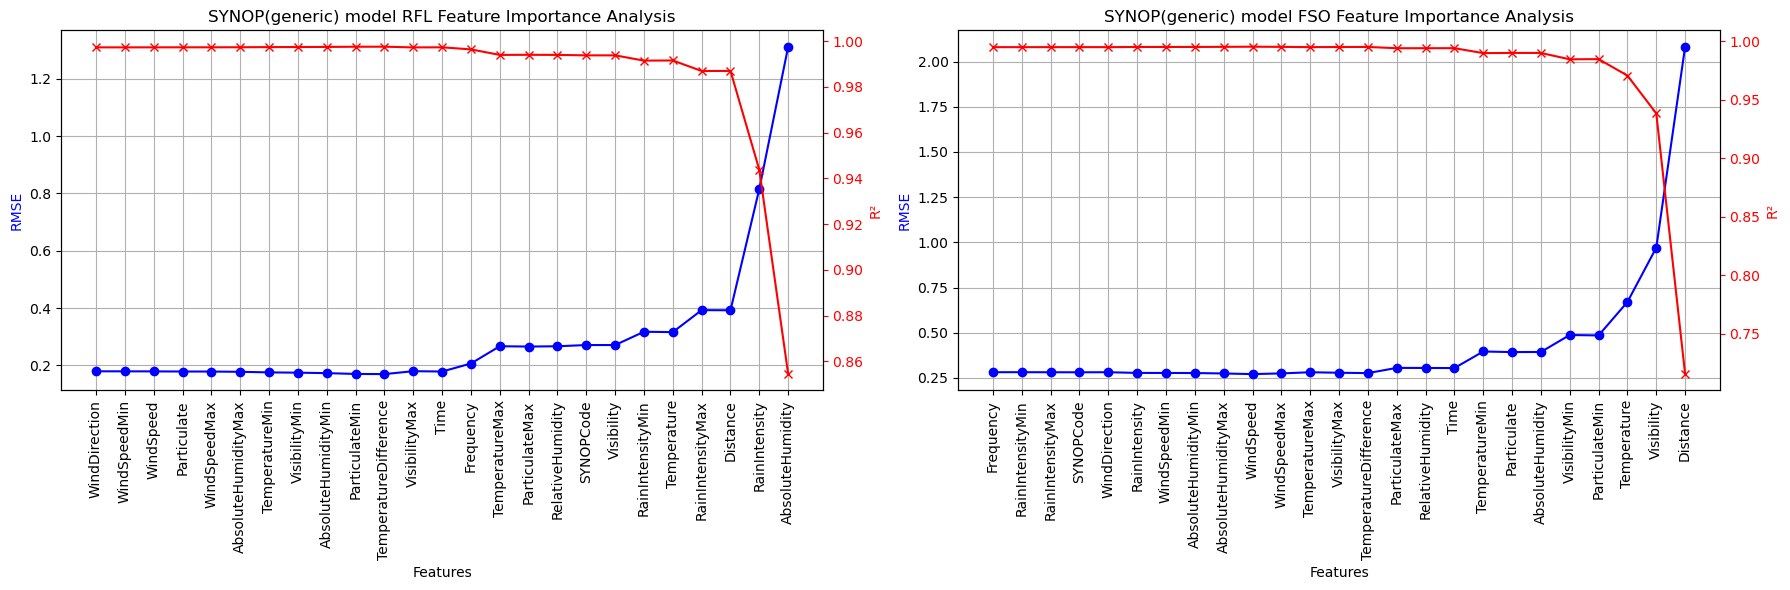

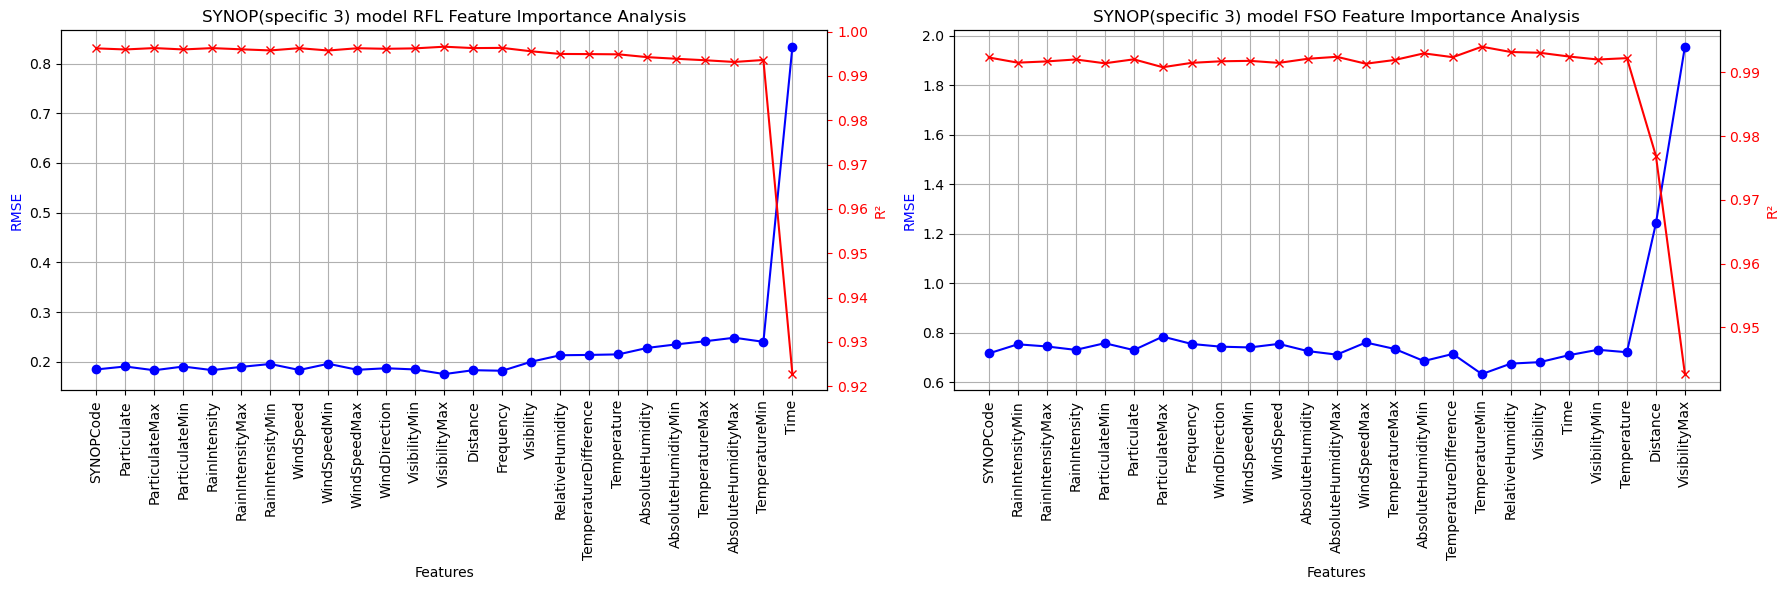

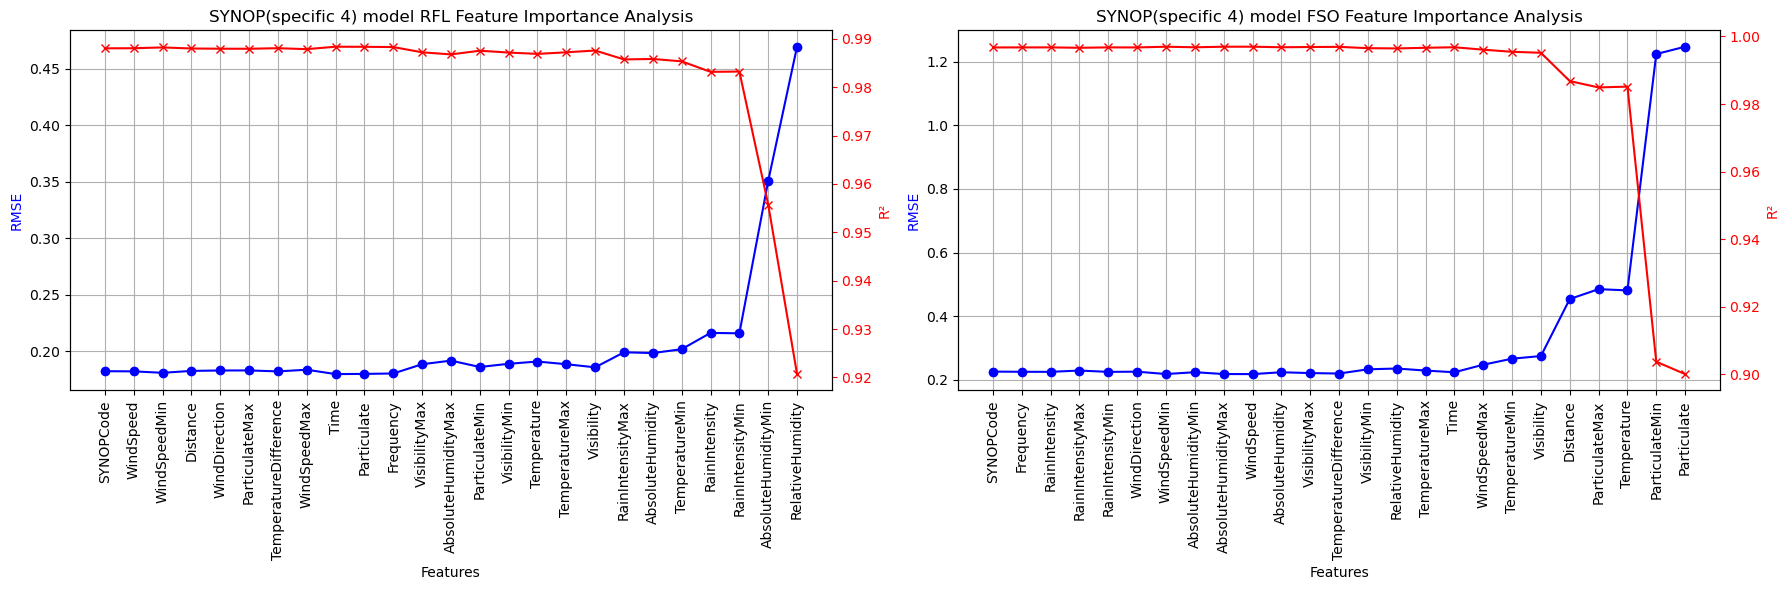

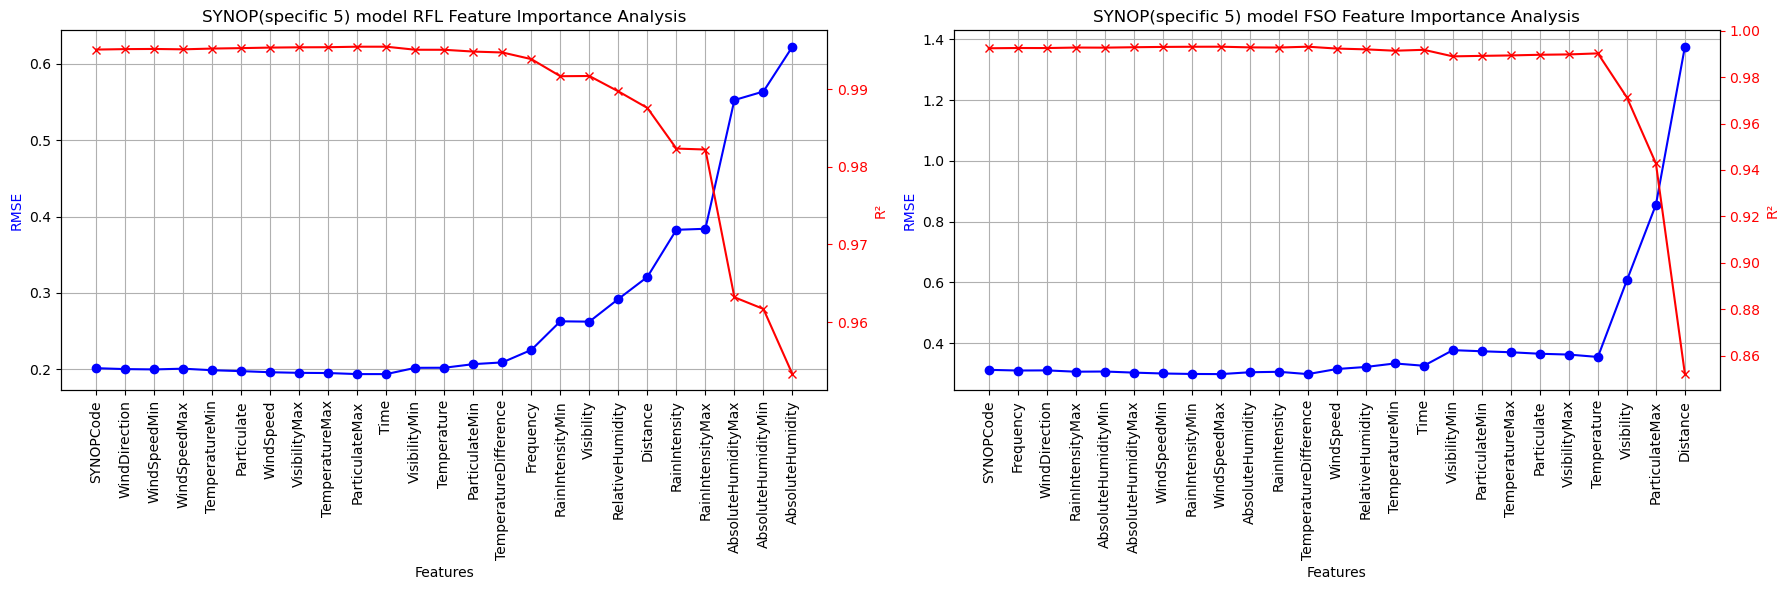

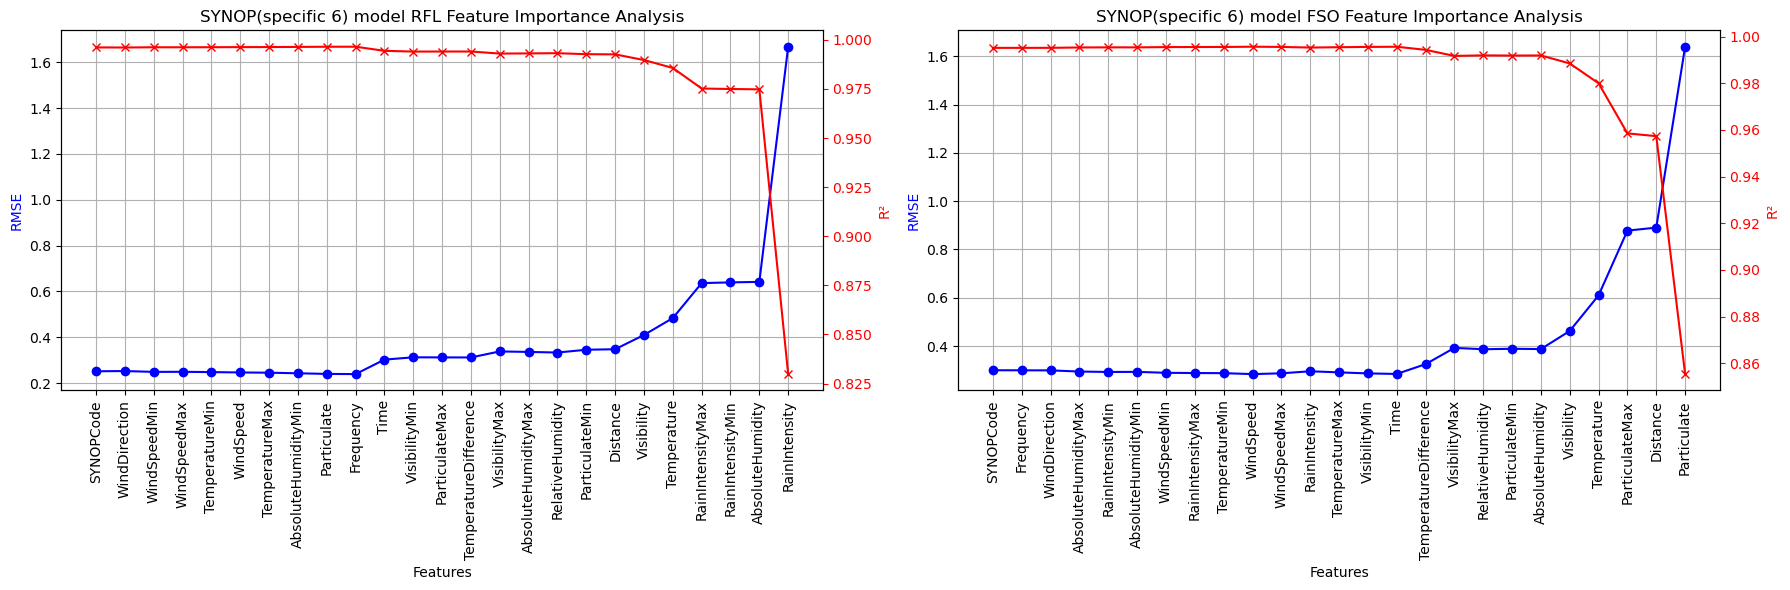

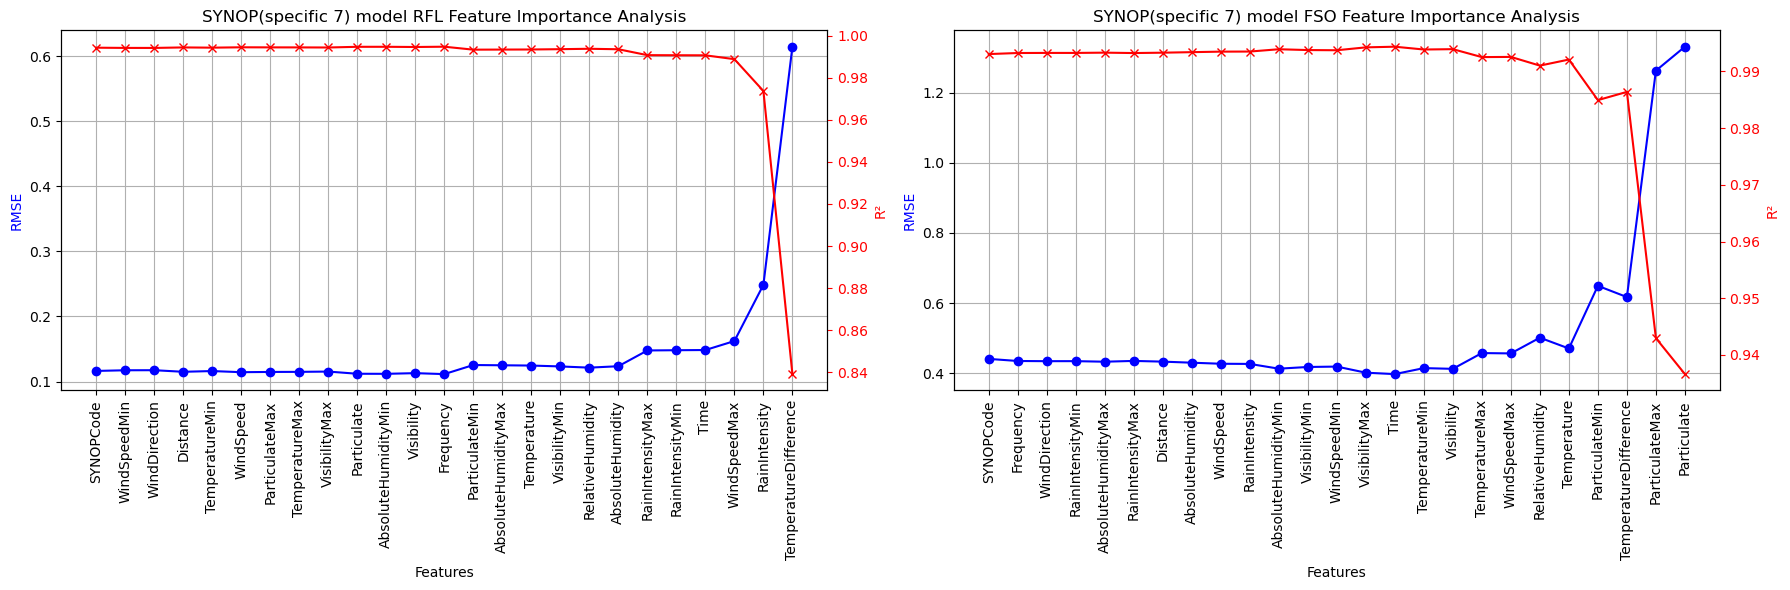

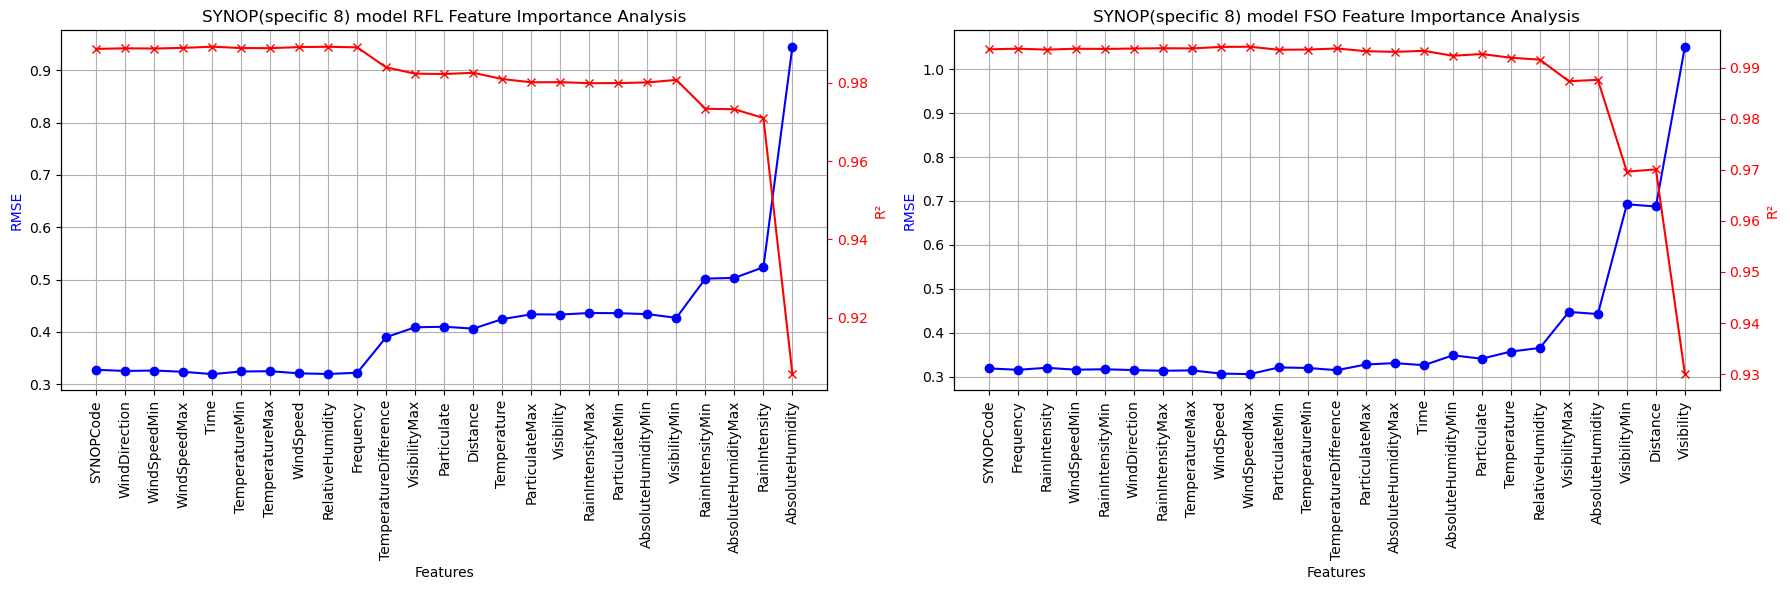

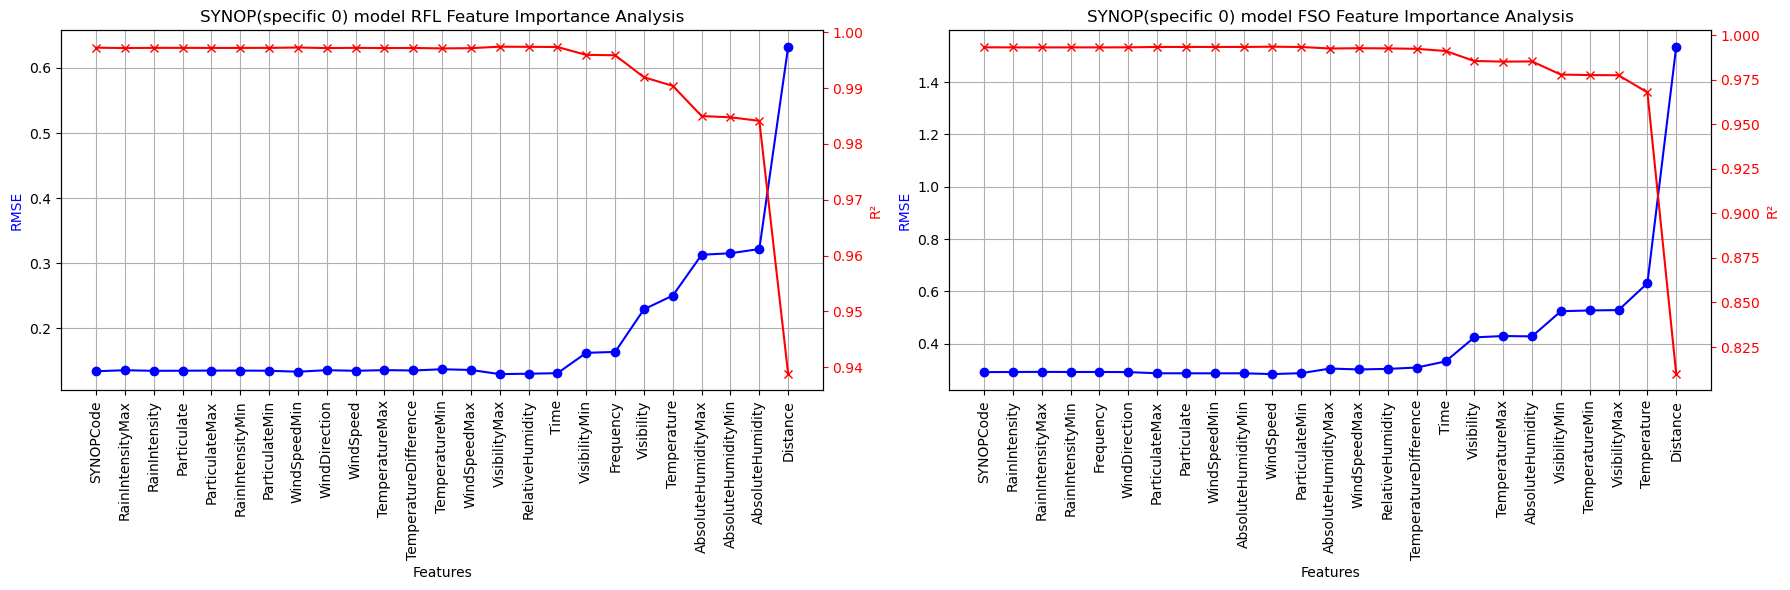

In [20]:
plot_results(g_result_RFL, g_result_FSO, 'generic')
plot_results(III_result_RFL, III_result_FSO, 'specific 3')
plot_results(IV_result_RFL, IV_result_FSO, 'specific 4')
plot_results(V_result_RFL, V_result_FSO, 'specific 5')
plot_results(VI_result_RFL, VI_result_FSO, 'specific 6')
plot_results(VII_result_RFL, VII_result_FSO, 'specific 7')
plot_results(VIII_result_RFL, VIII_result_FSO, 'specific 8')
plot_results(Zero_result_RFL, Zero_result_FSO, 'specific 0')